In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mínimo original DILOCCON50: 0.0
Máximo original DILOCCON50: 599623.5117187501
Número de registros con -99.0: 0
Filas originales: 309116
Filas después de borrar -99.0: 309116

Total de registros (sin -99): 309116
Valores > 0: 257142
Valores = 0: 51974

Ejemplo DILOCCON50 y DILOCCON50_log:
      DILOCCON50  DILOCCON50_log
0     938.061777        6.843816
1    1884.204624        7.541261
2  103807.704687       11.550295
3    9163.150469        9.122945
4    3429.491006        8.140167
5   66584.897266       11.106233
6   57989.877046       10.968024
7   46504.270312       10.747299
8    2362.059558        7.767289
9   45803.210286       10.732109

Mínimo log (considerando ceros): 0.0
Máximo log: 13.304057256781272
Número de registros después de log y normalización: 309116


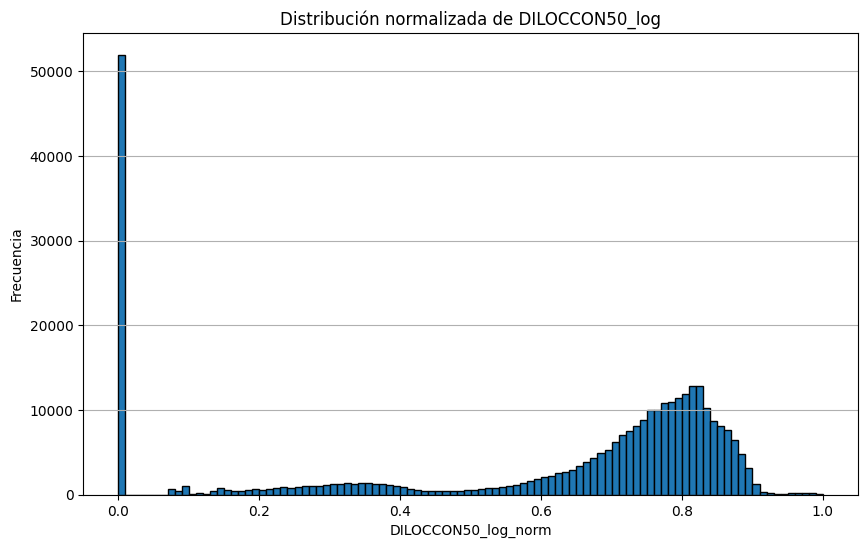


Tamaño de DILOCCON50_norm_array: (309116,)
Tipo: <class 'numpy.ndarray'>
Primeros valores: [0.51441569 0.56683919 0.86817842 0.68572655 0.61185599 0.83480046
 0.82441195 0.80782119 0.58382861 0.80667944]


In [2]:
#======================================================================
# 1) LEER ARCHIVO ORIGINAL
#======================================================================
archivo_entrada = "ITUR_resultados_nacional_v1_area_DILOCCON50_sin_menos99.csv"

df = pd.read_csv(archivo_entrada)

col_origen   = "DILOCCON50"
col_log      = "DILOCCON50_log"
col_log_norm = "DILOCCON50_log_norm"

# Asegurarnos de que sea numérica
df[col_origen] = pd.to_numeric(df[col_origen], errors="coerce")

# Mínimo y máximo originales (incluye -99 si existen)
min_origen = df[col_origen].min()
max_origen = df[col_origen].max()

print("Mínimo original DILOCCON50:", min_origen)
print("Máximo original DILOCCON50:", max_origen)

#======================================================================
# 2) CONTAR Y ELIMINAR -99.0
#======================================================================
num_menos99 = (df[col_origen] == -99.0).sum()
print("Número de registros con -99.0:", num_menos99)

print("Filas originales:", len(df))
# Nos quedamos solo con filas donde DILOCCON50 != -99.0
df = df[df[col_origen] != -99.0].copy()
print("Filas después de borrar -99.0:", len(df))

#======================================================================
# 3) LOG10 SOLO PARA > 0, PERO MANTENIENDO LOS CEROS
#======================================================================
# Creamos columna de log llena de 0
df[col_log] = 0.0

# Máscara: valores estrictamente mayores que 0
valores_validos = df[col_origen] > 0

num_validos = valores_validos.sum()
total_registros = len(df[col_origen])

print("\nTotal de registros (sin -99):", total_registros)
print("Valores > 0:", num_validos)
print("Valores = 0:", total_registros - num_validos)

# Aplicamos log10 SOLO donde el valor > 0
df.loc[valores_validos, col_log] = np.log(df.loc[valores_validos, col_origen])

print("\nEjemplo DILOCCON50 y DILOCCON50_log:")
print(df[[col_origen, col_log]].head(10))

#======================================================================
# 4) NORMALIZACIÓN min–max DE LA COLUMNA log (PARA TODOS)
#======================================================================
X_min = df[col_log].min()
X_max = df[col_log].max()
rango = X_max - X_min

print("\nMínimo log (considerando ceros):", X_min)
print("Máximo log:", X_max)

# Crear la columna normalizada
df[col_log_norm] = (df[col_log] - X_min) / rango

#======================================================================
# 5) HISTOGRAMA DE LA COLUMNA NORMALIZADA
#======================================================================
mask_norm_valid = df[col_log_norm].notna()
print("Número de registros después de log y normalización:", mask_norm_valid.sum())

plt.figure(figsize=(10, 6))
plt.hist(df.loc[mask_norm_valid, col_log_norm], bins=100, edgecolor='black')
plt.title("Distribución normalizada de DILOCCON50_log")
plt.xlabel("DILOCCON50_log_norm")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()

import numpy as np

#======================================================================
# 6) GUARDAR RESULTADO EN UN ARREGLO (NO EN ARCHIVO)
#======================================================================
DILOCCON50_norm = df[col_log_norm].copy()              # Serie de pandas

# 🔹 Convertir a arreglo NumPy
DILOCCON50_norm_array = DILOCCON50_norm.to_numpy(dtype=np.float64)

print("\nTamaño de DILOCCON50_norm_array:", DILOCCON50_norm_array.shape)
print("Tipo:", type(DILOCCON50_norm_array))
print("Primeros valores:", DILOCCON50_norm_array[:10])


P_USOSUEPV:
  Mínimo: 0.0
  Máximo: 0.222728430899293
Registros válidos en P_USOSUEPV_norm: 309116

Primeros 10 valores normalizados (array):
[0.97503579 0.97429955 0.98015571 0.97389499 0.98203076 0.97937772
 0.98475919 0.97640388 0.97503359 0.98248087]


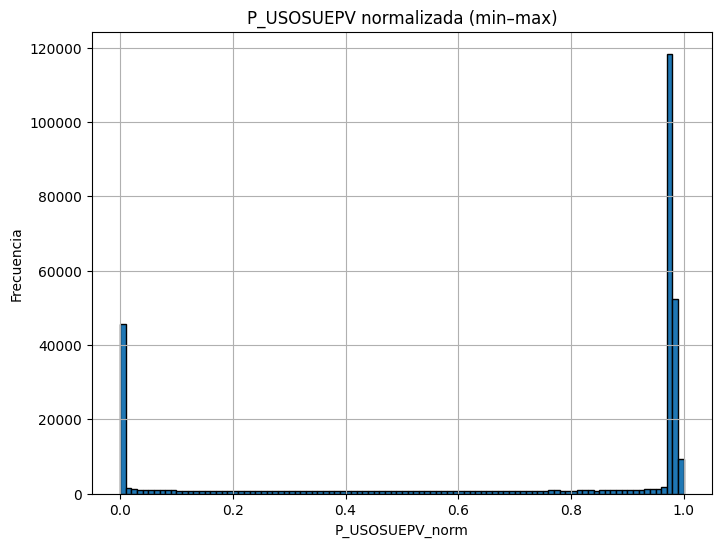

In [3]:
# ============================================================
# P_USOSUEPV → normalización min–max
# ------------------------------------------------------------
# Este bloque:
#   1) Convierte P_USOSUEPV a numérico.
#   2) Calcula su versión normalizada min–max en un array NumPy.
#   3) Guarda esa normalización en el DataFrame como
#      la columna: P_USOSUEPV_norm.
#   4) Muestra un histograma de la distribución normalizada.
# ============================================================
col = "P_USOSUEPV"

# Asegurarnos de que sea numérica
df[col] = pd.to_numeric(df[col], errors="coerce")

# Pasar a array de NumPy
valores = df[col].to_numpy(dtype=float)

# Calcular min y max ignorando NaN
P_min = np.nanmin(valores)
P_max = np.nanmax(valores)
P_rango = P_max - P_min

print("\nP_USOSUEPV:")
print("  Mínimo:", P_min)
print("  Máximo:", P_max)

# Normalización min–max en ARRAY
P_USOSUEPV_norm_array = (valores - P_min) / P_rango

# 👉 Guardar en el DataFrame como nueva columna
df["P_USOSUEPV_norm"] = P_USOSUEPV_norm_array

# Contar válidos (no NaN)
validos = np.sum(~np.isnan(P_USOSUEPV_norm_array))
print("Registros válidos en P_USOSUEPV_norm:", validos)

# Imprimir primeros 10 del ARRAY
print("\nPrimeros 10 valores normalizados (array):")
print(P_USOSUEPV_norm_array[:10])

# Histograma (usando solo valores válidos)
vals_validos = P_USOSUEPV_norm_array[~np.isnan(P_USOSUEPV_norm_array)]
plt.figure(figsize=(8, 6))
plt.hist(vals_validos, bins=100, edgecolor='black')
plt.title("P_USOSUEPV normalizada (min–max)")
plt.xlabel("P_USOSUEPV_norm")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


USO_SUECON:
  Mínimo: 0.0
  Máximo: 0.222685948597938
Registros válidos en USO_SUECON_norm_inv: 309116


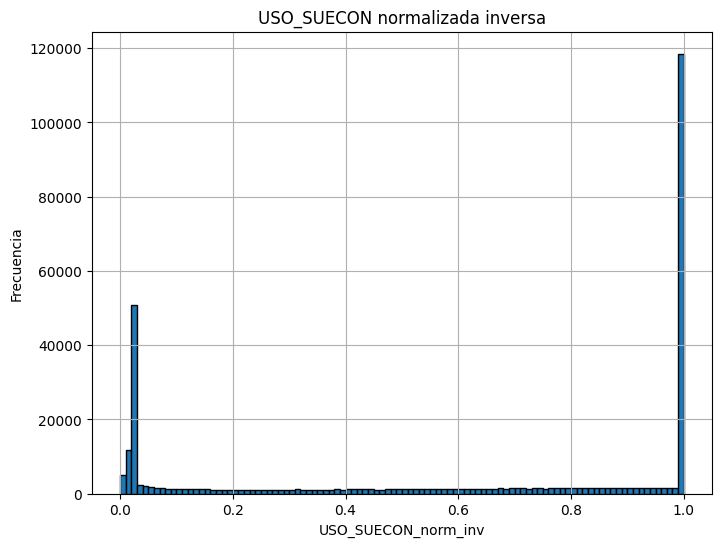

In [4]:
# ============================================================
# USO_SUECON → normalización inversa
# ------------------------------------------------------------
# Este bloque:
#   1) Convierte USO_SUECON a numérico.
#   2) Calcula la versión normalizada inversa:
#        USO_SUECON_norm_inv = (U_max - USO_SUECON) / (U_max - U_min)
#   3) Guarda el resultado en:
#        - Serie: USO_SUECON_norm_inv
#        - Columna del DataFrame: "USO_SUECON_norm_inv"
#   4) Genera un histograma de la distribución normalizada.
# ============================================================
col = "USO_SUECON"

df[col] = pd.to_numeric(df[col], errors="coerce")

U_min = df[col].min()
U_max = df[col].max()
U_rango = U_max - U_min

print("\nUSO_SUECON:")
print("  Mínimo:", U_min)
print("  Máximo:", U_max)

# Normalización inversa (Series)
USO_SUECON_norm_inv = (U_max - df[col]) / U_rango

# 👉 Guardar en el DataFrame como nueva columna
df["USO_SUECON_norm_inv"] = USO_SUECON_norm_inv

# Lista (si la necesitas)
USO_SUECON_norm_inv_lista = USO_SUECON_norm_inv.tolist()

# ➜ ARRAY de NumPy
USO_SUECON_norm_inv_array = USO_SUECON_norm_inv.to_numpy()

print("Registros válidos en USO_SUECON_norm_inv:",
      USO_SUECON_norm_inv.notna().sum())

plt.figure(figsize=(8, 6))
plt.hist(USO_SUECON_norm_inv.dropna(), bins=100, edgecolor='black')
plt.title("USO_SUECON normalizada inversa")
plt.xlabel("USO_SUECON_norm_inv")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


COND_ACCE:
  Mínimo: 0.0
  Máximo: 809.0
Registros válidos en COND_ACCE_norm: 309116


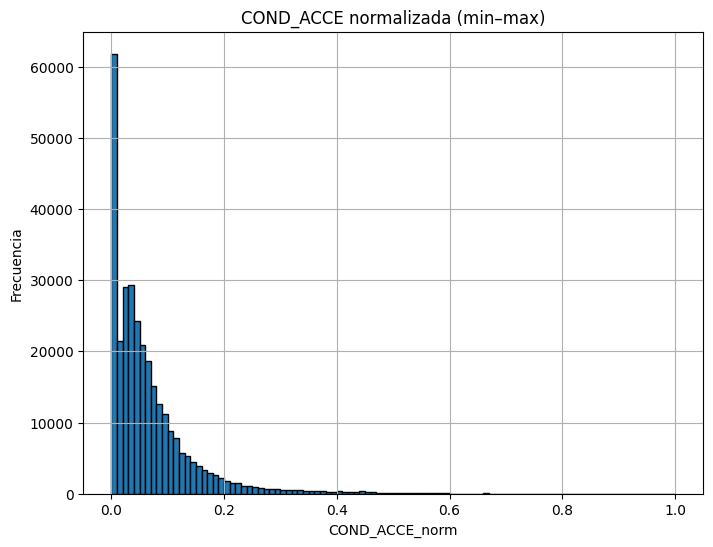

In [5]:
# ============================================================
# COND_ACCE → normalización min–max
# ------------------------------------------------------------
# Este bloque:
#   1) Convierte COND_ACCE a numérico.
#   2) Calcula la versión normalizada min–max:
#        COND_ACCE_norm = (COND_ACCE - C_min) / (C_max - C_min)
#   3) Guarda el resultado en:
#        - Serie: COND_ACCE_norm
#        - Columna del DataFrame: "COND_ACCE_norm"
#        - Array de NumPy: COND_ACCE_norm_array
#   4) Genera un histograma de la distribución normalizada.
# ============================================================
col = "COND_ACCE"

df[col] = pd.to_numeric(df[col], errors="coerce")

C_min = df[col].min()
C_max = df[col].max()
C_rango = C_max - C_min

print("\nCOND_ACCE:")
print("  Mínimo:", C_min)
print("  Máximo:", C_max)

# Series: normalización min–max
COND_ACCE_norm = (df[col] - C_min) / C_rango

# 👉 Guardar en el DataFrame como nueva columna
df["COND_ACCE_norm"] = COND_ACCE_norm

# Lista (si la necesitas)
COND_ACCE_norm_lista = COND_ACCE_norm.tolist()

# Array de NumPy
COND_ACCE_norm_array = COND_ACCE_norm.to_numpy()

print("Registros válidos en COND_ACCE_norm:", COND_ACCE_norm.notna().sum())

plt.figure(figsize=(8, 6))
plt.hist(COND_ACCE_norm.dropna(), bins=100, edgecolor='black')
plt.title("COND_ACCE normalizada (min–max)")
plt.xlabel("COND_ACCE_norm")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


EQUIP_URB:
  Mínimo: 0.0
  Máximo: 61.172
Registros válidos en EQUIP_URB_norm_inv: 309116

Primeros 10 valores normalizados (array):
[1.         1.         0.80664356 1.         0.99149938 1.
 1.         0.68637612 1.         1.        ]


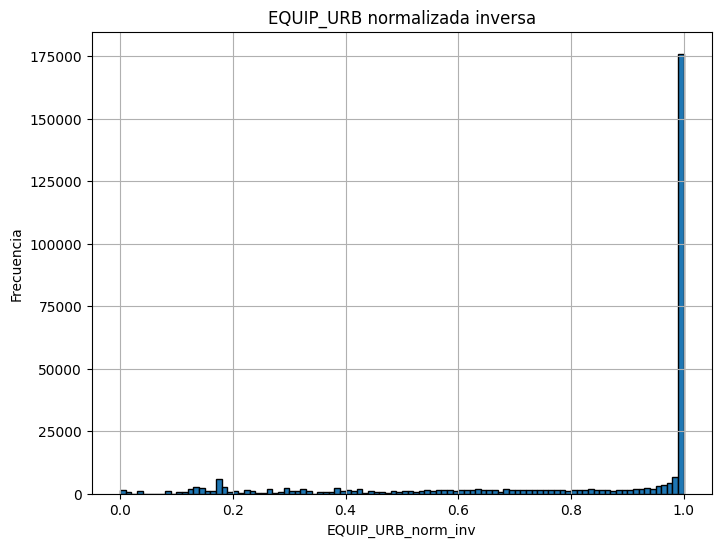

In [6]:
# ============================================================
# EQUIP_URB → normalización inversa
# ------------------------------------------------------------
# Este bloque:
#   1) Convierte EQUIP_URB a numérico.
#   2) Calcula la versión normalizada inversa:
#        EQUIP_URB_norm_inv = (E_max - EQUIP_URB) / (E_max - E_min)
#   3) Guarda el resultado en:
#        - Serie: EQUIP_URB_norm_inv
#        - Columna del DataFrame: "EQUIP_URB_norm_inv"
#        - Array de NumPy: EQUIP_URB_norm_inv_array
#   4) Genera un histograma de la distribución normalizada.
# ============================================================
col = "EQUIP_URB"

df[col] = pd.to_numeric(df[col], errors="coerce")

E_min = df[col].min()
E_max = df[col].max()
E_rango = E_max - E_min

print("\nEQUIP_URB:")
print("  Mínimo:", E_min)
print("  Máximo:", E_max)

# Series: normalización inversa
EQUIP_URB_norm_inv = (E_max - df[col]) / E_rango

# 👉 Guardar en el DataFrame como nueva columna
df["EQUIP_URB_norm_inv"] = EQUIP_URB_norm_inv

# Lista
EQUIP_URB_norm_inv_lista = EQUIP_URB_norm_inv.tolist()

# Array de NumPy
EQUIP_URB_norm_inv_array = EQUIP_URB_norm_inv.to_numpy()

print("Registros válidos en EQUIP_URB_norm_inv:",
      EQUIP_URB_norm_inv.notna().sum())

# (Opcional) ver primeros 10 del array
print("\nPrimeros 10 valores normalizados (array):")
print(EQUIP_URB_norm_inv_array[:10])

plt.figure(figsize=(8, 6))
plt.hist(EQUIP_URB_norm_inv.dropna(), bins=100, edgecolor='black')
plt.title("EQUIP_URB normalizada inversa")
plt.xlabel("EQUIP_URB_norm_inv")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


Descripción estadística de 'territorial':
count    309116.000000
mean          0.415833
std           0.218035
min           0.002700
25%           0.252720
50%           0.447813
75%           0.615788
max           0.970872
dtype: float64

Primeros 10 valores de territorial_array:
[0.60908505 0.424442   0.41281194 0.65335109 0.46325921 0.72589462
 0.68255727 0.42588106 0.37957038 0.48912473]


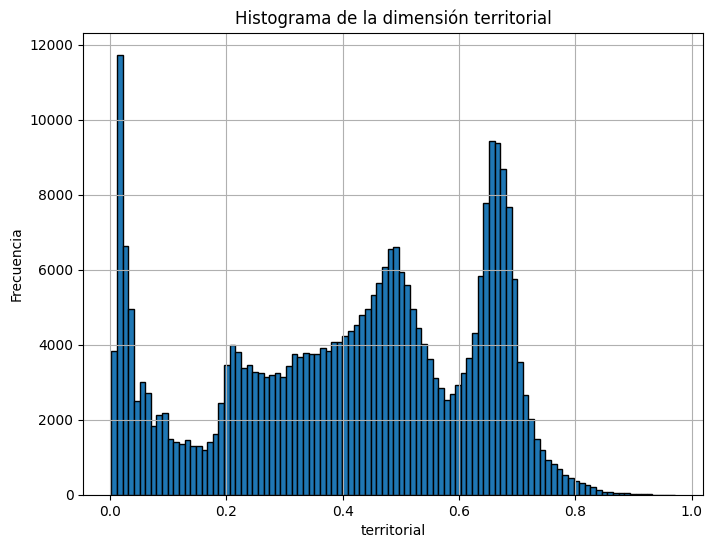

In [7]:
# ===============================================================
# CÁLCULO DE LA DIMENSIÓN TERRITORIAL (ITUR)
# ---------------------------------------------------------------
# Este bloque de código:
#   1) Convierte la columna CAR_SER_VI a arreglo NumPy numérico.
#   2) Calcula la variable "territorial" como combinación lineal
#      de varias variables normalizadas, usando los coeficientes
#      oficiales del modelo ITUR:
#          territorial =
#              0.08577 * EQUIP_URB_norm_inv +
#              0.30994 * COND_ACCE_norm +
#              0.12458 * USO_SUECON_norm_inv +
#              0.11860 * P_USOSUEPV_norm +
#              0.17644 * DILOCCON50_norm +
#              0.18467 * CAR_SER_VI
# ===============================================================


# Pasamos CAR_SER_VI a array también
CAR_SER_VI_array = pd.to_numeric(df["CAR_SER_VI"], errors="coerce").to_numpy()

#===============================================================
# 1) Calcular la variable territorial directamente en ARRAY
#===============================================================
territorial_array = (
    0.08577 * EQUIP_URB_norm_inv_array +
    0.30994 * COND_ACCE_norm_array +
    0.12458 * USO_SUECON_norm_inv_array +
    0.11860 * P_USOSUEPV_norm_array +
    0.17644 * DILOCCON50_norm_array +
    0.18467 * CAR_SER_VI_array
)

#===============================================================
# 2) Convertir a Serie (para describe(), dropna(), histograma)
#===============================================================
territorial = pd.Series(territorial_array, index=df.index)

print("\nDescripción estadística de 'territorial':")
print(territorial.dropna().describe())

# Guardar en el DataFrame
df["territorial"] = territorial

# (Opcional) ver primeros 10 valores del array
print("\nPrimeros 10 valores de territorial_array:")
print(territorial_array[:10])

#===============================================================
# 3) Histograma
#===============================================================
plt.figure(figsize=(8, 6))
plt.hist(territorial.dropna(), bins=100, edgecolor="black")
plt.title("Histograma de la dimensión territorial")
plt.xlabel("territorial")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [8]:
# ===============================================================
# 8) RESUMEN FINAL DE ARRAYS CALCULADOS
# ---------------------------------------------------------------
# En este bloque juntamos todos los arreglos (NumPy arrays) que
# hemos generado en el script y mostramos:
#   - el nombre del array
#   - su forma (shape)
#   - su tipo de dato (dtype)
# Esto sirve como verificación rápida de que todos los arrays
# existen, tienen el mismo número de registros y están listos
# para usarse en otros cálculos (por ejemplo, ITUR, demográfica, etc.).
# ===============================================================

arrays_dict = {
    "DILOCCON50_norm_array"   : DILOCCON50_norm_array,
    "P_USOSUEPV_norm_array"   : P_USOSUEPV_norm_array,
    "USO_SUECON_norm_inv_array": USO_SUECON_norm_inv_array,
    "COND_ACCE_norm_array"    : COND_ACCE_norm_array,
    "EQUIP_URB_norm_inv_array": EQUIP_URB_norm_inv_array,
    "CAR_SER_VI_array"        : CAR_SER_VI_array,
    "territorial_array"       : territorial_array,
}

print("\n========================================")
print("RESUMEN FINAL DE ARRAYS CALCULADOS")
print("========================================")
for nombre, arr in arrays_dict.items():
    if isinstance(arr, np.ndarray):
        print(f"{nombre}: shape = {arr.shape}, dtype = {arr.dtype}")
    else:
        print(f"{nombre}: (no es ndarray, tipo = {type(arr)})")

# (Opcional) solo los nombres de los arrays
nombres_arrays = list(arrays_dict.keys())
print("\nNombres de todos los arrays calculados:")
print(nombres_arrays)


RESUMEN FINAL DE ARRAYS CALCULADOS
DILOCCON50_norm_array: shape = (309116,), dtype = float64
P_USOSUEPV_norm_array: shape = (309116,), dtype = float64
USO_SUECON_norm_inv_array: shape = (309116,), dtype = float64
COND_ACCE_norm_array: shape = (309116,), dtype = float64
EQUIP_URB_norm_inv_array: shape = (309116,), dtype = float64
CAR_SER_VI_array: shape = (309116,), dtype = float64
territorial_array: shape = (309116,), dtype = float64

Nombres de todos los arrays calculados:
['DILOCCON50_norm_array', 'P_USOSUEPV_norm_array', 'USO_SUECON_norm_inv_array', 'COND_ACCE_norm_array', 'EQUIP_URB_norm_inv_array', 'CAR_SER_VI_array', 'territorial_array']


In [9]:
# ===============================================================
# CÁLCULO DE LA DIMENSIÓN DEMOGRÁFICA Y RECONSTRUCCIÓN DE TAM_POB
# ---------------------------------------------------------------
# Este bloque realiza el procedimiento completo de la dimensión
# demográfica del ITUR a partir de la variable TAM_POB y el área:
#
#  1) Convierte TAM_POB y area_km2 a numérico y maneja faltantes
#     usando -999 como código de "sin dato".
#  2) Calcula:
#        T_j = ln(TAM_POB_j)
#        P_j = ln(TAM_POB_j / A_j)
#     aplicando máscaras para evitar logaritmos de valores no válidos.
#  3) Obtiene los mínimos y máximos de T_j y P_j (L_T_min, L_T_max,
#     L_D_min, L_D_max) y sus rangos (Delta_L_T, Delta_L_D).
#  4) Calcula las versiones normalizadas invertidas:
#        TAM_POB_norm  (población normalizada)
#        DEN_POB_norm  (densidad de población normalizada)
#  5) Construye la dimensión demográfica:
#        d_j = β1 * TAM_POB_norm + β2 * DEN_POB_norm
#  6) Utiliza la fórmula inversa del modelo para reconstruir el tamaño
#     de la población:
#        TAM_POB_calc = exp( (c1 L_T_max + c2 L_D_max + c2 ln(A_j) - d_j) / (c1 + c2) )
#     donde:
#        c1 = β1 / Delta_L_T
#        c2 = β2 / Delta_L_D
#
# Al final:
#   - Guarda TAM_POB_calc en el DataFrame como "TAM_POB_calc".
#   - Deja en memoria arrays intermedios (T_j, P_j, TAM_POB_norm,
#     DEN_POB_norm, d_j) que pueden usarse para análisis adicionales.
# ===============================================================

# 2) TAM_POB a float y reemplazar NaN por -999
df["TAM_POB"] = pd.to_numeric(df["TAM_POB"], errors="coerce")
df["TAM_POB"] = df["TAM_POB"].fillna(-999)

print(df["TAM_POB"].dtype)       # debería ser float64
print((df["TAM_POB"] == -999).sum(), "valores -999")

# 3) Pasar TAM_POB y área a arreglos
tam_pob_array = df["TAM_POB"].to_numpy(dtype=np.float64)
print("Tipo arreglo:", type(tam_pob_array))
print("Forma arreglo:", tam_pob_array.shape)

df["area_km2"] = pd.to_numeric(df["area_km2"], errors="coerce")
area_array = df["area_km2"].to_numpy(dtype=np.float64)

# Contar ceros y -999 en TAM_POB
num_ceros_arr = np.sum(tam_pob_array == 0)
num_menos999_arr = np.sum(tam_pob_array == -999)
print("Ceros en arreglo:", num_ceros_arr)
print("-999 en arreglo:", num_menos999_arr)

# ======================================================
# 4) T_j = ln(TAM_POB_j)
# ======================================================
T_j = np.zeros_like(tam_pob_array, dtype=np.float64)

# válidos para el log: TAM_POB > 0 y distinto de -999
mask_valid_T = (tam_pob_array > 0) & (tam_pob_array != -999)
T_j[mask_valid_T] = np.log(tam_pob_array[mask_valid_T])

# donde TAM_POB era -999, dejamos -999
T_j[tam_pob_array == -999] = -999

# ======================================================
# 5) P_j = ln(TAM_POB_j / A_j)
#    - si TAM_POB == -999 → -999
#    - si TAM_POB == 0    → 0 (se queda 0)
# ======================================================
P_j = np.zeros_like(tam_pob_array, dtype=np.float64)  # por defecto 0

# válidos: TAM_POB > 0 (ni 0 ni -999) y área > 0
mask_valid_P = (tam_pob_array > 0) & (tam_pob_array != -999) & (area_array > 0)
P_j[mask_valid_P] = np.log(tam_pob_array[mask_valid_P] / area_array[mask_valid_P])

# donde TAM_POB era -999, dejamos -999
P_j[tam_pob_array == -999] = -999

# Guardar en df (solo en memoria)
df["TAM_POB_ln"] = T_j
df["P_ln_TAMPOB_div_A"] = P_j

print("TAM_POB:", tam_pob_array[:10])
print("area_km2:", area_array[:10])
print("ln(TAM_POB) T_j:", T_j[:10])
print("P_j = ln(TAM_POB / A):", P_j[:10])

# ======================================================
# 6) Contar -999 en LT_j y LD_j
# ======================================================
LT_j = T_j
LD_j = P_j

num_menos999_LT = np.sum(LT_j == -999)
num_menos999_LD = np.sum(LD_j == -999)

print("Número de -999 en LT_j:", num_menos999_LT)
print("Número de -999 en LD_j:", num_menos999_LD)

num_valid_LT = np.sum(LT_j != -999)
num_valid_LD = np.sum(LD_j != -999)

print("Válidos en LT_j:", num_valid_LT)
print("Válidos en LD_j:", num_valid_LD)

# ======================================================
# 7) L_T_min, L_T_max, L_D_min, L_D_max y rangos
# ======================================================
print("=========================")
print("Min y MAX de la TAM_POB")
print("=========================")

L_T_min = T_j[mask_valid_T].min()
L_T_max = T_j[mask_valid_T].max()
print("L_T_min:", L_T_min)
print("L_T_max:", L_T_max)

print("=========================")
print("Min y MAX de la DEN_POB")
print("=========================")

L_D_min = P_j[mask_valid_P].min()
L_D_max = P_j[mask_valid_P].max()
print("L_D_min:", L_D_min)
print("L_D_max:", L_D_max)

Delta_L_T = L_T_max - L_T_min
Delta_L_D = L_D_max - L_D_min

print("=========================")
print("Rangos ΔL_T y ΔL_D")
print("=========================")
print("Delta_L_T:", Delta_L_T)
print("Delta_L_D:", Delta_L_D)

# ======================================================
# 8) Normalización invertida ^TAM_POB_j y ^DEN_POB_j
# ======================================================
TAM_POB_norm = np.full_like(T_j, -999.0, dtype=np.float64)
TAM_POB_norm[mask_valid_T] = (L_T_max - T_j[mask_valid_T]) / Delta_L_T

DEN_POB_norm = np.full_like(P_j, -999.0, dtype=np.float64)
DEN_POB_norm[mask_valid_P] = (L_D_max - P_j[mask_valid_P]) / Delta_L_D

print("T_j (ln TAM_POB):", T_j[:10])
print("^TAM_POB_j (población normalizada):", TAM_POB_norm[:10])
print("P_j (ln TAM_POB/area):", P_j[:10])
print("^DEN_POB_j (densidad normalizada):", DEN_POB_norm[:10])

# ======================================================
# 9) Dimensión demográfica d_j
# ======================================================
BETA1 = 0.49964
BETA2 = 0.50036
ALPHA1 = 0.56957
ALPHA2 = 0.43043

d_j = np.full_like(T_j, -999.0, dtype=np.float64)
mask_d = (TAM_POB_norm != -999) & (DEN_POB_norm != -999)

d_j[mask_d] = (
    BETA1 * TAM_POB_norm[mask_d] +
    BETA2 * DEN_POB_norm[mask_d]
)

# ======================================================
# 🔟 Calcular TAM_POB_calc con la fórmula final
# ======================================================
c1 = BETA1 / Delta_L_T
c2 = BETA2 / Delta_L_D

A_j = area_array  # Aj = area_km2

TAM_POB_calc = np.full_like(A_j, -999.0, dtype=np.float64)

mask_valid_calc = (d_j != -999) & (A_j > 0)

num = (
    c1 * L_T_max
    + c2 * L_D_max
    + c2 * np.log(A_j[mask_valid_calc])  # ln(A_j)
    - d_j[mask_valid_calc]
)
den = c1 + c2

L_T_calc = num / den
TAM_POB_calc[mask_valid_calc] = np.exp(L_T_calc)

df["TAM_POB_calc"] = TAM_POB_calc

print("Primeros A_j (area_km2):", A_j[:5])
print("Primeros d_j:", d_j[:5])
print("Primeros TAM_POB_calc:", TAM_POB_calc[:5])

float64
0 valores -999
Tipo arreglo: <class 'numpy.ndarray'>
Forma arreglo: (309116,)
Ceros en arreglo: 7024
-999 en arreglo: 0
TAM_POB: [  2. 125.  56.   1.  31.   3.   3.  23.  10.  21.]
area_km2: [0.219 0.219 0.219 0.219 0.219 0.219 0.219 0.219 0.219 0.219]
ln(TAM_POB) T_j: [0.69314718 4.82831374 4.02535169 0.         3.4339872  1.09861229
 1.09861229 3.13549422 2.30258509 3.04452244]
P_j = ln(TAM_POB / A): [2.21183073 6.34699729 5.54403524 1.51868355 4.95267075 2.61729584
 2.61729584 4.65417777 3.82126864 4.56320599]
Número de -999 en LT_j: 0
Número de -999 en LD_j: 0
Válidos en LT_j: 309116
Válidos en LD_j: 309116
Min y MAX de la TAM_POB
L_T_min: 0.0
L_T_max: 9.55824698622306
Min y MAX de la DEN_POB
L_D_min: 1.5186835491656363
L_D_max: 11.076930535388694
Rangos ΔL_T y ΔL_D
Delta_L_T: 9.55824698622306
Delta_L_D: 9.558246986223057
T_j (ln TAM_POB): [0.69314718 4.82831374 4.02535169 0.         3.4339872  1.09861229
 1.09861229 3.13549422 2.30258509 3.04452244]
^TAM_POB_j (población n

In [10]:
# Arreglo con la dimensión demográfica
demografica_array = d_j.copy()

# (Opcional) Guardar también en el DataFrame
df["demografica"] = demografica_array

# (Opcional) ver un resumen y los primeros valores
print("\nDescripción estadística de 'demografica':")
val_dem = demografica_array[demografica_array != -999]
print("Total válidos:", val_dem.size)
print("Mínimo:", val_dem.min())
print("Máximo:", val_dem.max())
print("Primeros 10 valores de demografica_array:")
print(demografica_array[:10])


Descripción estadística de 'demografica':
Total válidos: 302092
Mínimo: 0.0
Máximo: 1.0
Primeros 10 valores de demografica_array:
[0.92748177 0.49485363 0.57886088 1.         0.64073044 0.88506132
 0.88506132 0.67195928 0.75909964 0.6814769 ]


In [11]:
# ======================================================
# 11) Ver población normalizada y calculada
#      solo donde TAM_POB != -999
# ======================================================

# Máscara: registros con TAM_POB válido
mask_tam_valid = df["TAM_POB"] != -999

# Seleccionar columnas de interés
cols_ver = ["TAM_POB",]  # original
# si quieres también normalizada y calculada:
# las agregamos si existen
if "TAM_POB_calc" in df.columns:
    cols_ver.append("TAM_POB_calc")
if len(TAM_POB_norm) == len(df):
    df["TAM_POB_norm"] = TAM_POB_norm
    cols_ver.append("TAM_POB_norm")

# Ver los primeros 20 registros válidos
resultado = df.loc[mask_tam_valid, cols_ver].head(20)
print("\nPrimeros 20 registros con TAM_POB != -999:")
print(resultado)


Primeros 20 registros con TAM_POB != -999:
    TAM_POB  TAM_POB_calc  TAM_POB_norm
0       2.0           2.0      0.927482
1     125.0         125.0      0.494854
2      56.0          56.0      0.578861
3       1.0           1.0      1.000000
4      31.0          31.0      0.640730
5       3.0           3.0      0.885061
6       3.0           3.0      0.885061
7      23.0          23.0      0.671959
8      10.0          10.0      0.759100
9      21.0          21.0      0.681477
10     23.0          23.0      0.671959
11      7.0           7.0      0.796416
12     22.0          22.0      0.676610
13      6.0           6.0      0.812543
14    234.0         234.0      0.429255
15     22.0          22.0      0.676610
16     18.0          18.0      0.697604
17     25.0          25.0      0.663236
18    203.0         203.0      0.444123
19    278.0         278.0      0.411229


N registros ITUR: 309116
N registros territorial: 309116

Descripción estadística de 'demografica_nueva':
Total válidos: 309116
Mínimo: -0.17825060322449088
Máximo: 1.8221412620168338
Primeros 10 valores de demografica_nueva_array:
[0.92161127 0.48400458 0.57690418 0.99790278 0.63652537 0.88578106
 0.88337452 0.66783811 0.7562515  0.6771011 ]


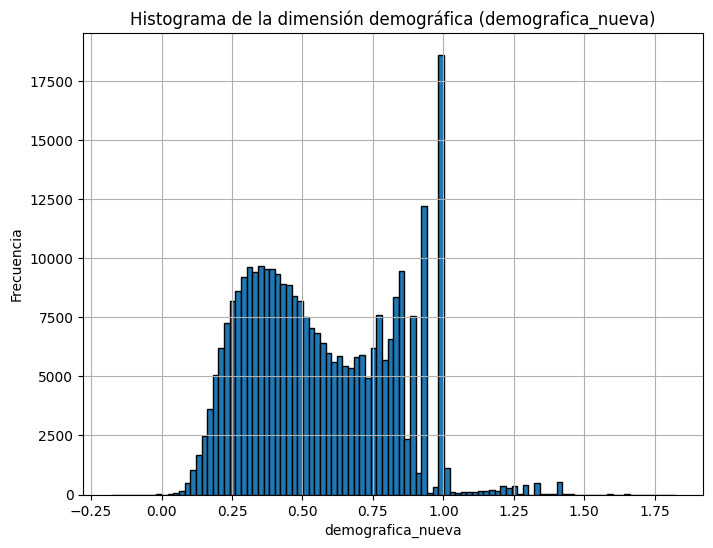

In [12]:
# ===============================================================
# CÁLCULO DE LA NUEVA DIMENSIÓN DEMOGRÁFICA A PARTIR DE ITUR
# ---------------------------------------------------------------
# En este bloque se calcula la variable:
#
#     demografica_nueva_j = (ITUR_j - α1 * territorial_j) / α2
#
# donde:
#   - ITUR_j        = valor del índice territorial urbano–rural (RESUL_ITUR)
#   - territorial_j = dimensión territorial
#   - α1 = 0.56957
#   - α2 = 0.43043
#
# Objetivo:
#   1) Obtener una nueva dimensión demográfica coherente con el ITUR
#      publicado y la dimensión territorial.
#   2) Guardar esta demográfica en:
#        - un arreglo NumPy: demografica_nueva_array
#        - una columna del DataFrame: "demografica_nueva"
#   3) Explorar sus valores con un resumen estadístico e histograma.
# ===============================================================


# ======================================================
# 11) Nueva dimensión demográfica a partir de ITUR y territorial
#     d_j = (ITUR_j - α1 * territorial_j) / α2
# ======================================================

# ======================================================
# 11) Nueva dimensión demográfica a partir de ITUR y territorial
#     demografica_nueva_j = (ITUR_j - α1 * territorial_j) / α2
# ======================================================

ALPHA1 = 0.56957
ALPHA2 = 0.43043

# Aseguramos que ITUR y territorial sean numéricos
df["RESUL_ITUR"]  = pd.to_numeric(df["RESUL_ITUR"],  errors="coerce")
df["territorial"] = pd.to_numeric(df["territorial"], errors="coerce")

# Pasamos a arrays NumPy
itur_array        = df["RESUL_ITUR"].to_numpy(dtype=np.float64)
territorial_array = df["territorial"].to_numpy(dtype=np.float64)

print("N registros ITUR:", len(itur_array))
print("N registros territorial:", len(territorial_array))

# Creamos arreglo para la nueva demográfica, inicializado en -999
demografica_nueva_array = np.full_like(itur_array, -999.0, dtype=np.float64)

# Válidos: donde ITUR y territorial no son NaN ni -999
mask_valid_dem = (
    ~np.isnan(itur_array) &
    ~np.isnan(territorial_array) &
    (itur_array != -999) &
    (territorial_array != -999)
)

demografica_nueva_array[mask_valid_dem] = (
    (itur_array[mask_valid_dem] - ALPHA1 * territorial_array[mask_valid_dem]) / ALPHA2
)

# Guardar en el DataFrame
df["demografica_nueva"] = demografica_nueva_array

# Resumen rápido de la demográfica nueva
val_dem = demografica_nueva_array[demografica_nueva_array != -999]

print("\nDescripción estadística de 'demografica_nueva':")
print("Total válidos:", val_dem.size)
print("Mínimo:", val_dem.min())
print("Máximo:", val_dem.max())
print("Primeros 10 valores de demografica_nueva_array:")
print(demografica_nueva_array[:10])

# (Opcional) Histograma de la nueva dimensión demográfica
plt.figure(figsize=(8, 6))
plt.hist(val_dem, bins=100, edgecolor="black")
plt.title("Histograma de la dimensión demográfica (demografica_nueva)")
plt.xlabel("demografica_nueva")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [13]:
# ===============================================================
# CÁLCULO DE TAM_POB_from_formula A PARTIR DE LA DEMOGRÁFICA NUEVA
# ---------------------------------------------------------------
# En este bloque se reconstruye el tamaño de la población (TAM_POB)
# usando la dimensión demográfica nueva (demografica_nueva_array),
# el área de cada unidad (area_km2) y los parámetros del modelo ITUR.
#
# Variables clave:
#   - BETA1, BETA2 : coeficientes β1 y β2 de la dimensión demográfica.
#   - ALPHA1, ALPHA2: coeficientes α1 y α2 del modelo ITUR (se usan
#                     para obtener d_j a partir de ITUR y territorial).
#   - d_array       : dimensión demográfica d_j, en este caso tomada
#                     de demografica_nueva_array.
#   - A_j           : área de cada unidad (area_km2) en km².
#   - Delta_L_T,
#     Delta_L_D     : rangos de los logaritmos de TAM_POB (T_j) y de la
#                     densidad de población (P_j), calculados antes.
#   - L_T_max,
#     L_D_max       : máximos de T_j y P_j (logs) usados en la fórmula.
#   - c1, c2        : coeficientes derivados del modelo:
#                        c1 = BETA1 / Delta_L_T
#                        c2 = BETA2 / Delta_L_D
#
# Fórmula aplicada:
#   Para cada unidad válida (A_j > 0 y d_j definido),
#
#     L_T_calc = ( c1 * L_T_max
#                  + c2 * L_D_max
#                  + c2 * ln(A_j)
#                  - d_j ) / (c1 + c2)
#
#     TAM_POB_j = exp(L_T_calc)
#
# Resultado:
#   - Se obtiene el arreglo TAM_POB_from_formula.
#   - Se guarda en el DataFrame como columna "TAM_POB_from_formula"
#     para comparar con la TAM_POB original.
# ===============================================================

# ------------------------------
# 1) Parámetros del modelo
# ------------------------------
BETA1  = 0.49964   # β1
BETA2  = 0.50036   # β2
ALPHA1 = 0.56957   # α1 (por si lo necesitas)
ALPHA2 = 0.43043   # α2

# ------------------------------
# 2) d_j ya calculado:
#    demografica_array = (itur_array - ALPHA1 * territorial_array) / ALPHA2
#    Aquí usamos la demográfica nueva como d_j.
# ------------------------------
d_array = demografica_nueva_array  # d_j

# A_j = área
df["area_km2"] = pd.to_numeric(df["area_km2"], errors="coerce")
area_array = df["area_km2"].to_numpy(dtype=np.float64)
A_j = area_array

# ------------------------------
# 3) Coeficientes c1 y c2
#    (ya debes tener Delta_L_T y Delta_L_D calculados antes)
# ------------------------------
c1 = BETA1 / Delta_L_T
c2 = BETA2 / Delta_L_D

# ------------------------------
# 4) Aplicar fórmula:
#    TAM_POB_j = exp( (c1 LT_max + c2 LD_max + c2 ln(A_j) - d_j) / (c1 + c2) )
# ------------------------------
TAM_POB_CAL_NACIONAL = np.full_like(A_j, np.nan, dtype=np.float64)

mask_valid = (~np.isnan(d_array)) & (~np.isnan(A_j)) & (A_j > 0)

num = (
    c1 * L_T_max
    + c2 * L_D_max
    + c2 * np.log(A_j[mask_valid])   # ln(A_j)
    - d_array[mask_valid]            # d_j
)
den = c1 + c2

L_T_calc = num / den
TAM_POB_CAL_NACIONAL[mask_valid] = np.exp(L_T_calc)

# Guardar en el DataFrame con el nuevo nombre de columna
df["TAM_POB_CAL_NACIONAL"] = TAM_POB_CAL_NACIONAL

# Verificación rápida
print(df[["TAM_POB", "TAM_POB_CAL_NACIONAL"]].head(20))


    TAM_POB  TAM_POB_CAL_NACIONAL
0       2.0              2.115431
1     125.0            138.658163
2      56.0             57.057205
3       1.0              1.020248
4      31.0             32.271363
5       3.0              2.979432
6       3.0              3.048761
7      23.0             23.924077
8      10.0             10.275972
9      21.0             21.896952
10     23.0             23.760817
11      7.0              6.976641
12     22.0             21.661200
13      6.0              6.231847
14    234.0            228.900939
15     22.0              0.441301
16     18.0             17.688832
17     25.0             27.135664
18    203.0            214.709454
19    278.0            296.539974


Registros válidos TAM_POB vs TAM_POB_calc: 309116
Registros válidos TAM_POB vs TAM_POB_CAL_NACIONAL: 309116

=== Comparación TAM_POB_calc vs TAM_POB ===
MAE   (|calc - real| promedio): 22.70013845934906
RMSE (raíz del error cuadrático medio): 150.59029955773795
Coeficiente de correlación de Pearson: 0.9809885492170399

Descripción de la diferencia (calc - real):
count    3.091160e+05
mean    -2.270014e+01
std      1.488698e+02
min     -9.990000e+02
25%     -5.684342e-13
50%     -1.136868e-13
75%     -1.065814e-14
max      3.637979e-12
Name: diff_calc, dtype: float64

=== Comparación TAM_POB_CAL_NACIONAL vs TAM_POB ===
MAE   (|TAM_POB_CAL_NACIONAL - real| promedio): 27.632218644499673
RMSE (raíz del error cuadrático medio): 221.8099596908654
Coeficiente de correlación de Pearson: 0.9632659116662732

Descripción de la diferencia (TAM_POB_CAL_NACIONAL - real):
count    309116.000000
mean         25.573822
std         220.331103
min       -2302.117410
25%           0.062982
50%           1

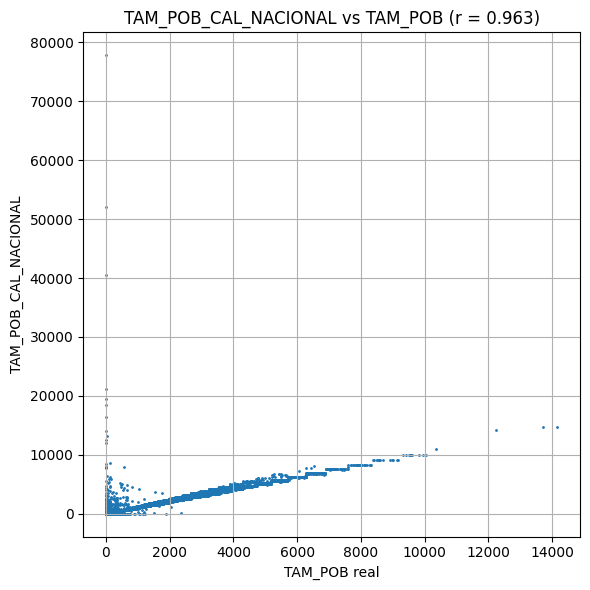

In [14]:
# Asegurarnos de que TAM_POB sea numérica
df["TAM_POB"] = pd.to_numeric(df["TAM_POB"], errors="coerce")

# Máscara general: TAM_POB real válida (≠ NaN y ≠ -999)
mask_base = df["TAM_POB"].notna() & (df["TAM_POB"] != -999)

# Máscara para cada comparación
mask_calc = mask_base & df["TAM_POB_calc"].notna()
mask_form = mask_base & df["TAM_POB_CAL_NACIONAL"].notna()

df_calc = df.loc[mask_calc, ["TAM_POB", "TAM_POB_calc"]].copy()
df_form = df.loc[mask_form, ["TAM_POB", "TAM_POB_CAL_NACIONAL"]].copy()

print("Registros válidos TAM_POB vs TAM_POB_calc:", len(df_calc))
print("Registros válidos TAM_POB vs TAM_POB_CAL_NACIONAL:", len(df_form))

# ==============================
# A) TAM_POB_calc vs TAM_POB
# ==============================
df_calc["diff_calc"] = df_calc["TAM_POB_calc"] - df_calc["TAM_POB"]

mae_calc  = np.mean(np.abs(df_calc["diff_calc"]))
rmse_calc = np.sqrt(np.mean(df_calc["diff_calc"]**2))
corr_calc = df_calc["TAM_POB_calc"].corr(df_calc["TAM_POB"])   # ← coef. correlación

print("\n=== Comparación TAM_POB_calc vs TAM_POB ===")
print("MAE   (|calc - real| promedio):", mae_calc)
print("RMSE (raíz del error cuadrático medio):", rmse_calc)
print("Coeficiente de correlación de Pearson:", corr_calc)

print("\nDescripción de la diferencia (calc - real):")
print(df_calc["diff_calc"].describe())

# ==============================
# B) TAM_POB_CAL_NACIONAL vs TAM_POB
# ==============================
df_form["diff_form"] = df_form["TAM_POB_CAL_NACIONAL"] - df_form["TAM_POB"]

mae_form  = np.mean(np.abs(df_form["diff_form"]))
rmse_form = np.sqrt(np.mean(df_form["diff_form"]**2))
corr_form = df_form["TAM_POB_CAL_NACIONAL"].corr(df_form["TAM_POB"])  # ← coef. correlación

print("\n=== Comparación TAM_POB_CAL_NACIONAL vs TAM_POB ===")
print("MAE   (|TAM_POB_CAL_NACIONAL - real| promedio):", mae_form)
print("RMSE (raíz del error cuadrático medio):", rmse_form)
print("Coeficiente de correlación de Pearson:", corr_form)

print("\nDescripción de la diferencia (TAM_POB_CAL_NACIONAL - real):")
print(df_form["diff_form"].describe())

# ==============================
# Gráfica TAM_POB_CAL_NACIONAL vs TAM_POB (con r)
# ==============================
plt.figure(figsize=(6, 6))
plt.scatter(df_form["TAM_POB"], df_form["TAM_POB_CAL_NACIONAL"], s=1)
plt.xlabel("TAM_POB real")
plt.ylabel("TAM_POB_CAL_NACIONAL")
plt.title(f"TAM_POB_CAL_NACIONAL vs TAM_POB (r = {corr_form:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()